#!/usr/bin/env python3
#graph
#https://networkx.github.io/documentation/latest/reference/readwrite/gml.html
#http://snap.stanford.edu/data/index.html

Use the Amazon data 0601

#Product co-purchasing networks
Name 	Type 	Nodes 	Edges 	Description
amazon0601 	Directed 	403,394 	3,387,388 	Amazon product co-purchasing network from June 1 2003

amazon-meta 	Metadata 	548,552 	1,788,725 	Amazon product metadata: product info and all reviews on around 548,552 products.

In [86]:
#this is a text file which contains all the co-purchased products from Amazon on 06_01
file = 'C:/Users/moore/Dropbox/graphs/Amazon0601.txt'
location_gml = 'C:/Users/moore/Dropbox/graphs/Amazon.gml'
location_pickle = 'C:/Users/moore/Dropbox/graphs/Amazon.gpickle'
file_meta = 'C:/Users/moore/Dropbox/graphs/Amazon-meta.txt'
pickle_meta = 'C:/Users/moore/Dropbox/graphs/AmazonMeta.p'

import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [87]:
def build_graph(file, location_gml, location_pickle):
    nodes = {}
    paths = []

    with open(file, 'r') as f:
        data = f.readline()
        while data:
            data = f.readline() 
            path = []
            try:
                test = data[0]
            except:
                test = '#'
            
            if test != '#':
                links = data.split()
                try:
                    nodes[links[0]] += 1
                except:
                    nodes[links[0]] = 1
            
                path = links[0],links[1]
                paths.append(path)
   
    graph = nx.DiGraph()
    graph.add_edges_from(paths)
    nx.write_gml(graph, location_gml)
    nx.write_gpickle(graph, location_pickle)
    return graph

In [88]:
def load_meta(file, pick_loc):
    meta = {}
    record = {}
    with open(file, 'r', encoding="utf8") as f:
        data = f.readline()
        while data:
            data = f.readline()
            if len(data) != 1: 
                components = data.replace('\n','').split(':')
                label = components[0].strip()
                if label == 'Id':
                    record['Id'] = components[1].strip()
                elif label == 'ASIN':
                    record['ASIN'] = components[1].strip()
                elif label == 'title':
                    record['title'] = str(components[1:]).replace("[",'').replace("]",'').replace("'",'').strip()
                elif label == 'group':
                    record['group'] = components[1].strip()
                elif label == 'salesrank':
                    record['salesrank'] = components[1].strip()
                elif label == 'similar':
                    sims = components[1].split()
                    record['similar'] = {'count': sims[0],
                                     'sims' : sims[1:]}
                elif label == 'categories':
                    cats = int(components[1])
                    categories = []
                    for i in range(0, cats):
                        cat = f.readline()
                        cat_s = cat.replace('\n','').split('|')
                        categories.append(cat_s[1:])
                    record['categories'] = {'count' : cats, 'values' : categories}    
                elif label =='reviews':
                    reviews = int(components[3].split()[0])
                    review_list = []
                    head_list = data.split()
                    head = {'total' : head_list[2],
                            'downloaded' : head_list[4],
                            'avg rating' : head_list[7]}
                    if reviews > 0:
                        for i in range(0,reviews):
                            review = f.readline()
                            if len(review) > 20:
                                review_data = review.replace('\n','').split()                          
                                rev_entry = {
                                    'date' : review_data[0],
                                    'customer' : review_data[2],
                                    'rating' : review_data[4],
                                    'votes' : review_data[6],
                                    'helpful' : review_data[8]
                                }
                            review_list.append(rev_entry)
                        record['reviews'] = {'head' : head,
                                        'reviews' : review_list}     
          
            else:
                if len(record.keys()) > 0:
                    meta[record['Id']] = record
                record = {}

    pickle.dump(meta, open(pick_loc, 'wb'))
    return meta

In [89]:
try:
    print("Trying to load from previous stored graph")
    graph = nx.read_gpickle(location_pickle)
except:
    try:
        print("No data found.. trying GML stored file")
        graph = nx.read_gml(location_gml)
    except:
        print("no.. parsing text file and building stored files...")
        graph = build_graph(file,location_gml, location_pickle)
        print('done')
        
try:
    print("Trying to load meta data from previous data file...")
    meta = pickle.load(open(pickle_meta, 'rb'))  
except:  
    print("no..  parsing from text and building output file for future...")
    meta = load_meta(file_meta, pickle_meta)
    print('done')

Trying to load from previous stored graph
Trying to load meta data from previous data file...


In [90]:
# Use a list comprehension to get the nodes of interest: noi
noi = [(n,d) for n,d in graph.nodes(data=True)]

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v, d) for u, v, d in graph.edges(data=True)]

In [91]:
type(graph), len(noi), len(eoi)

(networkx.classes.digraph.DiGraph, 403394, 3387388)

In [92]:
noi[1]

('1', {})

In [93]:
len(graph.nodes()), len(graph.edges())

(403394, 3387388)

In [94]:
from networkx.algorithms import approximation

In [95]:
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 403394
Number of edges: 3387388
Average in degree:   8.3972
Average out degree:   8.3972


In [96]:
nx.density(graph)

2.0816473245108078e-05

In [97]:
nx.is_directed(graph)

True

In [98]:
noi[1]

('1', {})

In [99]:
eoi[1]

('0', '2', {})

In [100]:
neighbours = list(nx.all_neighbors(graph, '50000'))

In [131]:
print('50000', meta['50000']['ASIN'], meta['50000']['title'])
print('Neighbors')
for neighbour in neighbours:
    if (int(neighbour) > 0):
        try:
            print(neighbour, meta[neighbour]['ASIN'], meta[neighbour]['title'])
        except:
            continue

50000 0961710438 Traveling Jewish in America,  The Complete Guide for Business & Pleasure
Neighbors
44713 033519883X Changing Academic Work,  Developing the Learning University
44715 0452283523 Churchill,  A Biography
44717 0816041369 Heritage of Scotland,  A Cultural History of Scotland & Its People
44718 0590447874 Two-minute Mysteries (Apple Paperbacks)
49998 0471153001 Foundations of Image Science
50003 0688175694 The Notorious Dr. August,  His Real Life and Crimes
12918 1581690738 Take Your Hat Off Son!
44713 033519883X Changing Academic Work,  Developing the Learning University
44714 0283992573 The Wonder That Was India
44715 0452283523 Churchill,  A Biography
44717 0816041369 Heritage of Scotland,  A Cultural History of Scotland & Its People
44718 0590447874 Two-minute Mysteries (Apple Paperbacks)
49998 0471153001 Foundations of Image Science
49999 B00004TGQX Party Tyme Karaoke,  Country
50003 0688175694 The Notorious Dr. August,  His Real Life and Crimes
83742 0141185465 All My

In [102]:
a = list(graph.nodes(data=False))

In [103]:
H = graph.subgraph(a[1:90])

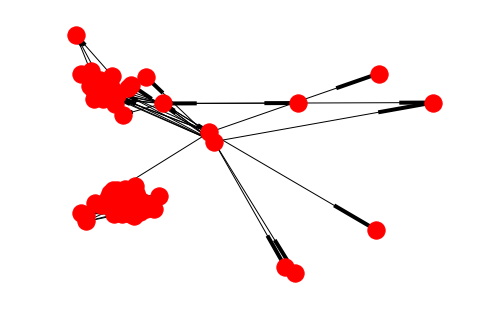

In [104]:
nx.draw(H)
plt.show()

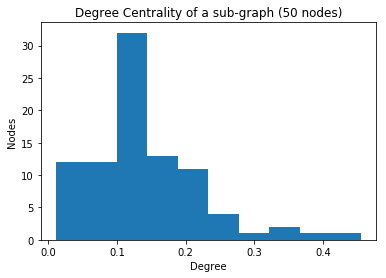

In [125]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx 

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(H).values()))
plt.title('Degree Centrality of a sub-graph (50 nodes)')
plt.xlabel('Degree')
plt.ylabel('Nodes')
plt.show()

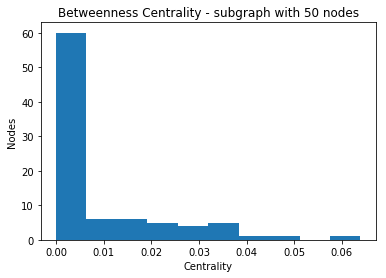

In [127]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(H).values()))
plt.title('Betweenness Centrality - subgraph with 50 nodes')
plt.xlabel('Centrality')
plt.ylabel('Nodes')
plt.show()

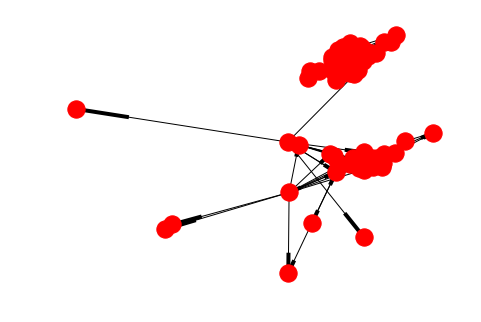

In [122]:
# Extract the nodes of interest: nodes
#nodes = [n for n, d in graph.nodes(data=True) if d['values'] == 2.5]
nodes = [n for n, d in H.nodes(data=True)]
# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = H.neighbors(n)
    
    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = H.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub, with_labels=False)
plt.show()

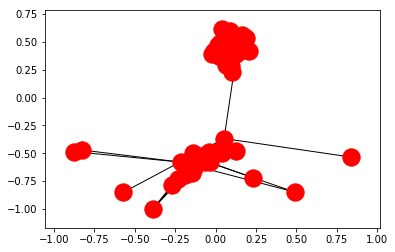

In [123]:
nx.draw_networkx(H, pos=None, arrows=False, with_labels=False)
plt.show()

In [109]:
nx.degree(H, nbunch=None, weight=None)

DiDegreeView({'1': 11, '2': 11, '3': 11, '4': 23, '5': 40, '6': 32, '7': 10, '8': 13, '9': 23, '10': 13, '155': 10, '185': 11, '233': 6, '234': 9, '235': 10, '3943': 6, '47': 22, '54': 16, '118': 11, '355': 13, '34': 12, '44': 29, '4954': 2, '4955': 7, '36': 19, '48': 27, '58': 19, '106': 18, '1032': 10, '1033': 10, '46': 22, '49': 10, '50': 10, '51': 16, '52': 7, '53': 8, '55': 15, '56': 7, '57': 14, '108': 18, '1521': 14, '1522': 11, '59': 5, '60': 11, '61': 4, '62': 14, '63': 10, '15328': 9, '1034': 8, '1035': 11, '11': 13, '12': 33, '13': 17, '14': 20, '15': 8, '16': 11, '17': 3, '18': 3, '19': 18, '20': 20, '21': 11, '24': 12, '26': 20, '27': 19, '30': 12, '31': 18, '209': 7, '22': 12, '23': 11, '25': 10, '64': 3, '65': 3, '66': 10, '67': 10, '74': 16, '75': 8, '76': 10, '134': 13, '1107': 9, '69': 9, '105': 13, '401': 5, '443': 1, '1590': 1, '78': 9, '266': 4, '451': 2, '1148': 3, '2440': 3})

In [110]:
nx.density(H), nx.density(graph)

(0.06945863125638406, 2.0816473245108078e-05)

In [111]:
print(nx.info(H))

Name: 
Type: SubDiGraph
Number of nodes: 89
Number of edges: 544
Average in degree:   6.1124
Average out degree:   6.1124


In [112]:
nx.number_of_nodes(H)

89

In [113]:
print(list(nx.all_neighbors(H, '50')))

['5', '44', '49', '52', '57', '105', '106', '49', '52', '105']


In [114]:
nx.number_of_selfloops(H)

0

In [115]:
from networkx.algorithms import approximation as approx

In [116]:
approx.node_connectivity(H)

0

In [117]:
approx.max_clique(H)

{'12', '20', '209', '27', '30'}

In [118]:
print(list(nx.all_neighbors(H, '30')))

['12', '20', '22', '27', '69', '209', '401', '12', '20', '27', '64', '209']


In [119]:
a=nx.degree_centrality(H)
b=nx.in_degree_centrality(H)
c=nx.out_degree_centrality(H)

In [120]:
from networkx.algorithms import community

In [121]:
#cen = nx.center(graph) #Return the center of the graph G.
#dia=nx.diameter(H)#Return the diameter of the graph G.
#ec=nx.eccentricity(H) #Return the eccentricity of nodes in G.
#per=nx.periphery(H) #Return the periphery of the graph G.
#rad=nx.radius(H) #Return the radius of the graph G.

In [1]:
from neo4j.v1 import GraphDatabase

In [152]:
from neo4jrestclient.client import GraphDatabase
from neo4jrestclient.constants import RAW
from neo4jrestclient.client import Node 
from urllib.parse import urlparse
import re, json

In [153]:
#https://gist.github.com/coolgarifTech/5671071
#functions are from https://gist.github.com/coolgarifTech/5671071 
#please ensure to recognise the authors at coolgarifTech for their work and rights

def getNodes(db):
    q = "START n=node(*) RETURN n"
    params = {}
    querySquenceObject = db.query(q, params=params, returns=RAW)	
 
    #Blank list to hold the JSON
    nodeJSON = []

    # Iterating over the resposes from the graph db
    # NOTE:Excluding the ROOT NODE from RETURN!!!!
    for node in querySquenceObject[1:]:
            n = node.pop()
            data = n.get('data')
            name = data.get('name')
            description = data.get('description')

            self = n.get('self')
            self = urlparse(self)
            uid = doRegEX(self)

            nodeJSON.append(createNodeJSON(name, uid, description))

    return nodeJSON

def doRegEX(urlString):
    regex = re.compile("([^/]*)$")
    stripedURLComponent = regex.search(urlString.path)
    return stripedURLComponent.group(0)

def createNodeJSON(name, uid, description):	
    JSONObject = {
        'name': name,
        'id' : uid,
        'description' : description
    }
    return JSONObject

def getRels(db):
    q = "MATCH p=()-[r:Knows]->() RETURN p"

    params = {}
    querySquenceObject = db.query(q, params=params, returns=RAW)

    #Blank list to hold the JSON
    relsJSON = []

    for rel in querySquenceObject:
        r = rel.pop()
        start = r.get('start')
        end = r.get('end')

        start = urlparse(start)
        end = urlparse(end)

        startNode = doRegEX(start)
        endNode = doRegEX(end)

        relsJSON.append(createRelsJSON(startNode, endNode))

    return relsJSON

def createRelsJSON(startNode, endNode):
    JSONObject = {
        'startNode' : startNode,
        'endNode' : endNode
    }
    return JSONObject

In [354]:
# create DB connection
db = GraphDatabase("http://localhost:7474/db/data")

nodes = getNodes(db)
rels = getRels(db)

result = {
    'nodes' : nodes,
    'rels' : rels}


print(result)

{'nodes': [], 'rels': []}


In [352]:
number_of_nodes = len(nodes)
number_of_relationships = len(rels)
                        
print ("Number of nodes created")
print (number_of_nodes)
print ("Number of relationships created")
print (number_of_relationships)

Number of nodes created
2
Number of relationships created
1


In [353]:
#delete all nodes and clear the database
for no in nodes:
    n = db.node[int(no['id'])]
    print (no['id'])
    try:
        n.delete()
    except:
        rel = n.relationships.all()
        for r in rel:
            r.delete()
        n.delete()    
 
   

80
81


In [345]:
gdb = db

In [346]:
alice = gdb.nodes.create(name="Alice", age=30)

In [347]:
bob = gdb.nodes.create(name="Bob", age=30)

In [348]:
alice.relationships.create("Knows", bob, since=1980)

<Neo4j Relationship: http://localhost:7474/db/data/relationship/24>

In [349]:
alice['rating'] = 'deep'

In [350]:
bob['rating'] = 'none'

In [311]:
alice.items()

dict_items([('name', 'Alice'), ('age', 30), ('rating', 'deep')])

In [310]:
del alice['beauty']
del bob['beauty']